# 7506 - Trabajo práctico 1


##### Librerías

In [135]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [136]:
complete_dataset = pd.read_csv("./properati_argentina_2021.csv")
df = complete_dataset.copy()

# Analisis Exploratorio del Dataset

**Primeras 5 observaciones**

In [137]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


**Ultimas 5 observaciones**

In [138]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


In [139]:
df.shape

(460154, 20)

In [140]:
df.size

9203080

In [141]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [143]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

In [144]:
df.isna().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

#### Filtrado de Dataset
Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento
Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.
Luego consideraremos solo las que esten cotizadas en dolares
Por último tomamos solo las que sean ventas

In [145]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[(df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
df_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

df_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

,place_l2,place_l3,property_currency,property_type,operation
25,Capital Federal,NaN,USD,Casa,Venta
42,Capital Federal,Boca,USD,Departamento,Venta
43,Capital Federal,Boca,USD,Departamento,Venta
49,Capital Federal,Once,USD,Departamento,Venta
51,Capital Federal,Boedo,USD,PH,Venta
...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,USD,Departamento,Venta
460073,Capital Federal,Villa del Parque,USD,Departamento,Venta
460074,Capital Federal,Villa del Parque,USD,Departamento,Venta
460075,Capital Federal,Villa del Parque,USD,Departamento,Venta


## Análisis de variables

### Conversion de tipo en las fechas


## TODO: Evitar el coerce y graficar % de NaN

In [146]:
# Tipo de variable
df_filtrado[["start_date", "end_date", "created_on"]] = df_filtrado[["start_date", "end_date", "created_on"]].apply(pd.to_datetime,
                                                                                                  errors="coerce")
df_filtrado.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

### Analisis de variables cuantitativas

In [147]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
description_quantitatives = df_filtrado.describe()
quantitative_mode = df_filtrado[description_quantitatives.columns].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)
description_quantitatives = description_quantitatives.append(df_filtrado.median().rename("median"),
                                                             ignore_index=False)
description_quantitatives

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,place_l5
count,90519.000000,90519.000000,0.0,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04,NaN
mean,-34.591481,-58.449795,NaN,2.822799,2.014629,109.092970,87.931932,2.262382e+05,NaN
std,0.181719,0.292630,NaN,1.426148,1.129767,980.401976,990.927129,3.186035e+05,NaN
min,-53.788624,-71.471192,NaN,1.000000,-1.000000,10.000000,1.000000,5.000000e+03,NaN
25%,-34.615975,-58.466522,NaN,2.000000,1.000000,45.000000,40.000000,9.500000e+04,NaN
50%,-34.595790,-58.439000,NaN,3.000000,2.000000,65.000000,58.000000,1.439000e+05,NaN
75%,-34.577413,-58.408862,NaN,4.000000,3.000000,105.000000,88.000000,2.370000e+05,NaN
max,-24.219827,-54.133330,NaN,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07,NaN
mode,-34.541250,-58.472966,NaN,3.000000,1.000000,50.000000,40.000000,1.100000e+05,NaN
median,-34.595790,-58.439000,NaN,3.000000,2.000000,65.000000,58.000000,1.439000e+05,NaN


In [148]:
# Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

# [y frecuencias de cada uno] falta esta parte
qualitative_dataset = df_filtrado.drop(axis="columns",columns=description_quantitatives.columns)
qualitative_dataset.drop(axis="columns",columns=["start_date","end_date","created_on"],inplace=True)

qualitative_posible_values = {}

for column in qualitative_dataset.columns.tolist():
    qualitative_posible_values[column] = qualitative_dataset[column].unique()
    print(f"La columna {column} puede tomar los siguientes valores: \n{qualitative_dataset[column].unique()}")
#properties_dataset.drop(axis="columns",columns=description_quantitatives.columns)


La columna id puede tomar los siguientes valores: 
['CyZu6IaZgmQYGk8jmPajCg==' 'd3Z0MblSb2IMBoOBMGJEEQ=='
 'rL7qPkQnomsMGu2ViS3sBw==' ... 'Rmamz8v4Wkh5xF7PA59Jqw=='
 '7yl8Dfx5wobH21YdMU+Kgg==' '9OVDfhoDvkY4rr/SX0ggVw==']
La columna place_l2 puede tomar los siguientes valores: 
['Capital Federal']
La columna place_l3 puede tomar los siguientes valores: 
[nan 'Boca' 'Once' 'Boedo' 'Flores' 'Nuñez' 'Retiro' 'Almagro' 'Coghlan'
 'Liniers' 'Palermo' 'Pompeya' 'Barracas' 'Belgrano' 'Floresta' 'Recoleta'
 'Saavedra' 'Balvanera' 'Caballito' 'Chacarita' 'Mataderos' 'Monserrat'
 'San Telmo' 'Versalles' 'Agronomía' 'Colegiales' 'Tribunales'
 'Villa Luro' 'Parque Chas' 'Barrio Norte' 'Monte Castro' 'San Nicolás'
 'Villa Crespo' 'Villa Devoto' 'Villa Lugano' 'Constitución'
 'Puerto Madero' 'San Cristobal' 'Villa Ortuzar' 'Villa Urquiza'
 'Velez Sarsfield' 'Parque Chacabuco' 'Parque Patricios'
 'Villa Santa Rita' 'Villa del Parque' 'Parque Avellaneda'
 'Villa Pueyrredón' 'Villa General Mitre' 'Centr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe971281590>,
      dtype=object)

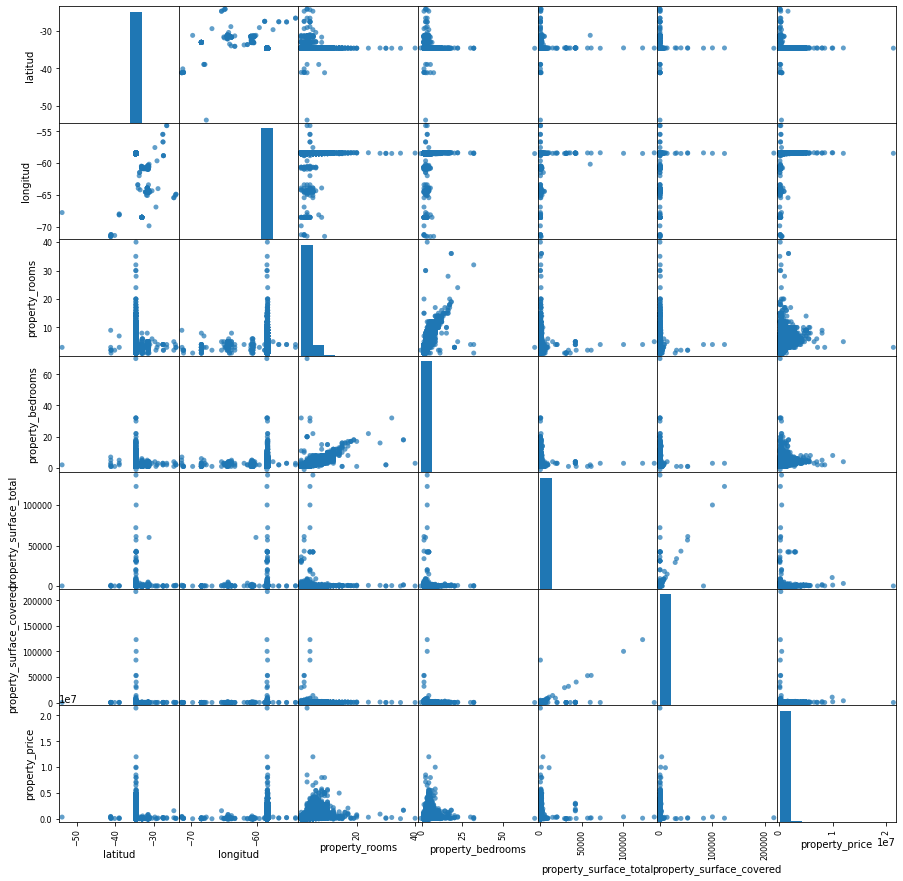

In [155]:
# Realizar un análisis gráfico de las distribuciones de las variables
columns=description_quantitatives.columns.tolist()
quantitative_dataset = df_filtrado[columns].drop(axis="columns",columns=["place_l5","place_l6"])
scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)


In [156]:
# Analizar las correlaciones existentes entre las variables.
quantitative_dataset.corr()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.239235,0.005521,0.003162,0.025348,0.002352,0.016635
longitud,-0.239235,1.000000,-0.008324,-0.008556,-0.015056,-0.001155,0.023314
property_rooms,0.005521,-0.008324,1.000000,0.871940,0.067211,0.076097,0.488934
property_bedrooms,0.003162,-0.008556,0.871940,1.000000,0.067702,0.075075,0.425386
property_surface_total,0.025348,-0.015056,0.067211,0.067702,1.000000,0.604311,0.085235
property_surface_covered,0.002352,-0.001155,0.076097,0.075075,0.604311,1.000000,0.056238
property_price,0.016635,0.023314,0.488934,0.425386,0.085235,0.056238,1.000000


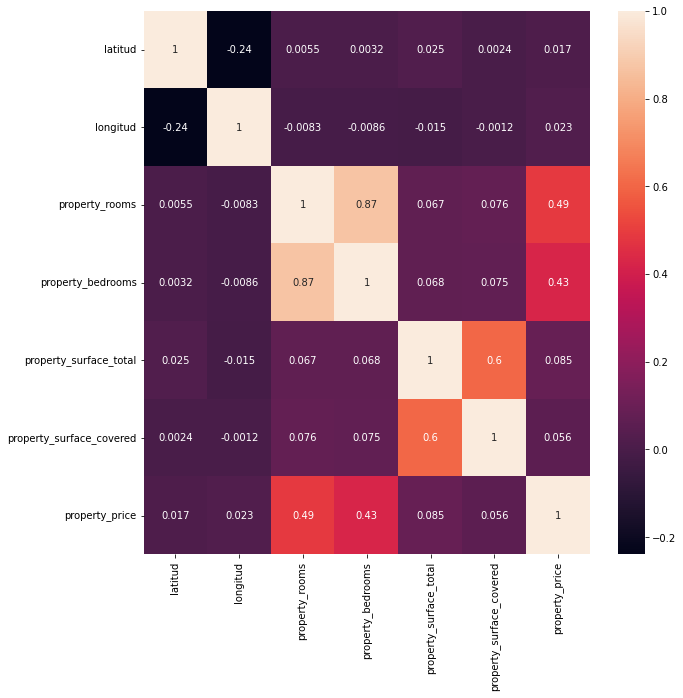

In [157]:
# Analizar las correlaciones existentes entre las variables.
plt.figure(figsize=(10, 10))
sns.heatmap(quantitative_dataset.corr(),annot=True)

## Análisis de valores faltantes

### Porcentaje de valores faltantes



id                            0.000000
start_date                    0.000000
end_date                      5.348598
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
place_l2                      0.000000
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


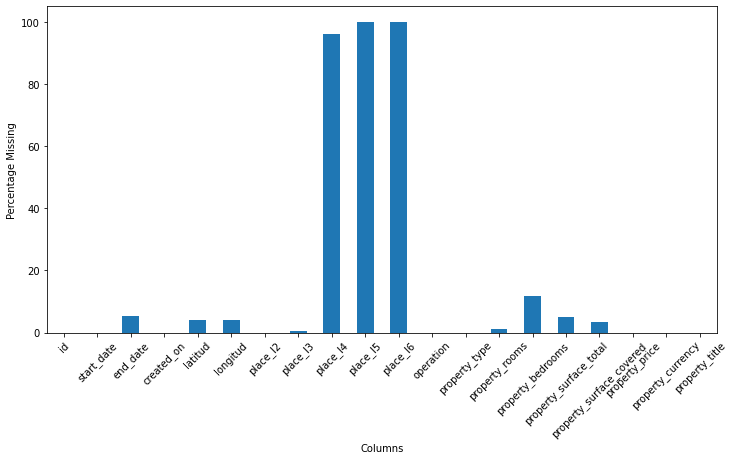

In [150]:
# Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
# el porcentaje de datos faltantes con respecto al total del dataset
percent_missing = df_filtrado.isna().sum() * 100 / len(df_filtrado)
plt.figure(figsize=(12,6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = df_filtrado.shape[0]
print(df_filtrado.isna().sum() / rows * 100)

In [151]:
# Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
# datos faltantes de cada registro. Realizar un gráfico que permita conocer la
# proporción de faltantes por fila en el dataset.

Como podemos observar, las columnas place_l4,place_l5 y place_l6 tienen un porcentaje demasiado alto de valores faltantes (aun solo considerando que sean NaNs) por lo que se descartaran dichas columnas. Por otro lado se descartara la columna id ya que en nuestro caso no sera de utilidad

In [152]:
# Consigna: Determinar variables irrelevantes en el análisis (Ids por ejemplo)
# TODO: No hardcodear las columnas. Generar un nuevo ds y en base a eso realizar las operaciones necesarias.
properties_dataset = df_filtrado.drop(axis="columns", columns=["id", "place_l4", "place_l5", "place_l6"])
properties_dataset.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

## Limpieza

## Graficos
